In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
zomato_df = pd.read_csv('zomato_restaurants.csv')

In [3]:
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zomato_df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### 1. Tot num of restaurents

In [5]:
len(zomato_df['name'].unique())

8792

#### 2. Restaurents with online orders

In [6]:
zomato_df['online_order'].value_counts()/ zomato_df.shape[0]*100


online_order
Yes    58.866524
No     41.133476
Name: count, dtype: float64

#### 3. Restaurents with Online booked 

In [7]:
zomato_df['book_table'].value_counts()/zomato_df.shape[0]*100

book_table
No     87.530213
Yes    12.469787
Name: count, dtype: float64

([<matplotlib.patches.Wedge at 0x1fbc193a210>,
 [Text(-0.30245810454915784, 1.0576006311422714, 'Yes'),
  Text(0.3024581045491579, -1.0576006311422714, 'No')],
 [Text(-0.16497714793590426, 0.5768730715321481, '58.87%'),
  Text(0.1649771479359043, -0.576873071532148, '41.13%')])

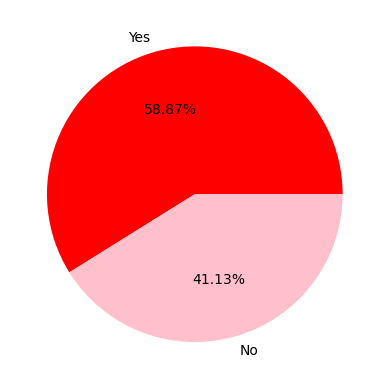

In [8]:
plt.pie(zomato_df['online_order'].value_counts(),labels = zomato_df['online_order'].unique(),autopct='%.2f%%', colors = ['red','pink'])


([<matplotlib.patches.Wedge at 0x1fbaafe08c0>,
 [Text(-1.0166665902958882, 0.41998695715001977, 'Yes'),
  Text(1.0166666001263924, -0.41998693335322057, 'No')],
 [Text(-0.5545454128886663, 0.22908379480910165, '87.53%'),
  Text(0.5545454182507594, -0.2290837818290294, '12.47%')])

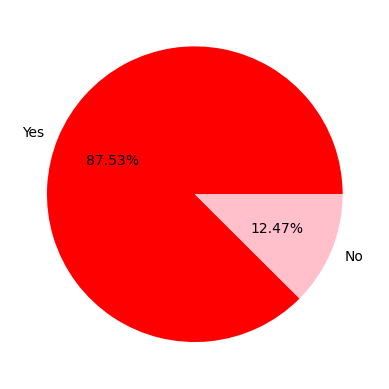

In [9]:
plt.pie(zomato_df['book_table'].value_counts(), labels =('Yes','No'),autopct='%.2f%%',colors = ['red','pink'])   # labels = zomato_df['online_orders'].unique()

In [10]:
zomato_df['name'].value_counts().sort_values(ascending=False)[:21]

name
Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Chef Baker's         62
Pizza Hut            62
Sweet Truth          60
Beijing Bites        60
Subway               60
KFC                  60
Domino's Pizza       60
Smoor                59
McDonald's           59
Chai Point           58
Faasos               57
Lassi Shop           56
Name: count, dtype: int64

In [11]:
zomato_df['name'].value_counts().sort_values(ascending=False)[:21].index

Index(['Cafe Coffee Day', 'Onesta', 'Just Bake', 'Empire Restaurant',
       'Five Star Chicken', 'Kanti Sweets', 'Petoo', 'Polar Bear',
       'Baskin Robbins', 'Chef Baker's', 'Pizza Hut', 'Sweet Truth',
       'Beijing Bites', 'Subway', 'KFC', 'Domino's Pizza', 'Smoor',
       'McDonald's', 'Chai Point', 'Faasos', 'Lassi Shop'],
      dtype='object', name='name')

#### 4. Famouse Chains in bengaluru

<Axes: ylabel='name'>

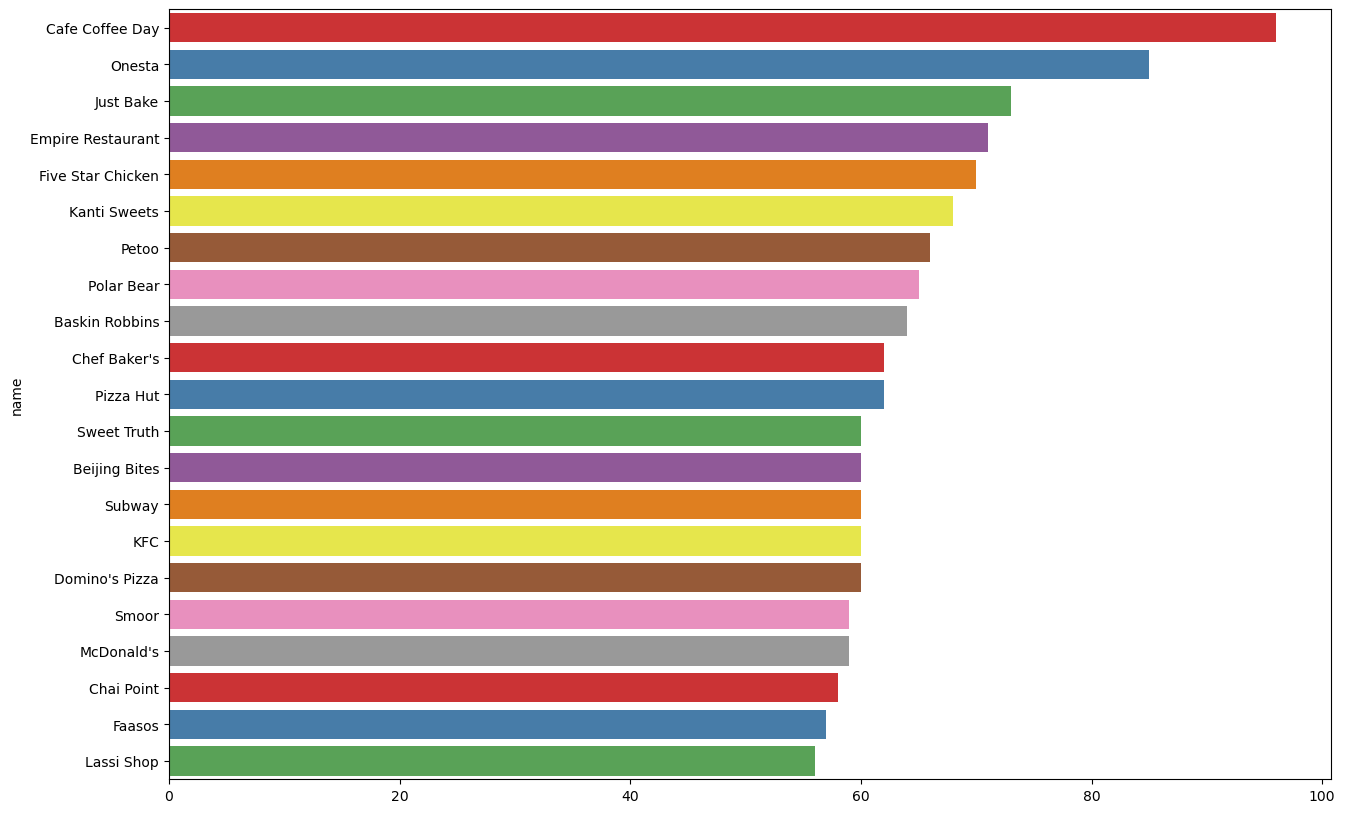

In [12]:
plt.figure(figsize=(15,10))
names = (zomato_df['name'].value_counts().sort_values(ascending=False)[:21]).index
counts= (zomato_df['name'].value_counts().sort_values(ascending=False)[:21]).values

sns.barplot(x= counts, y= names, orient = 'h', hue = names, palette = 'Set1')

### 5. Most popular restaurunts in bnglr

In [13]:
rest_type = zomato_df['rest_type'].value_counts().sort_values(ascending = False)[:21].index
rest_type_count = zomato_df['rest_type'].value_counts().sort_values(ascending = False)[:21].values


<Axes: ylabel='rest_type'>

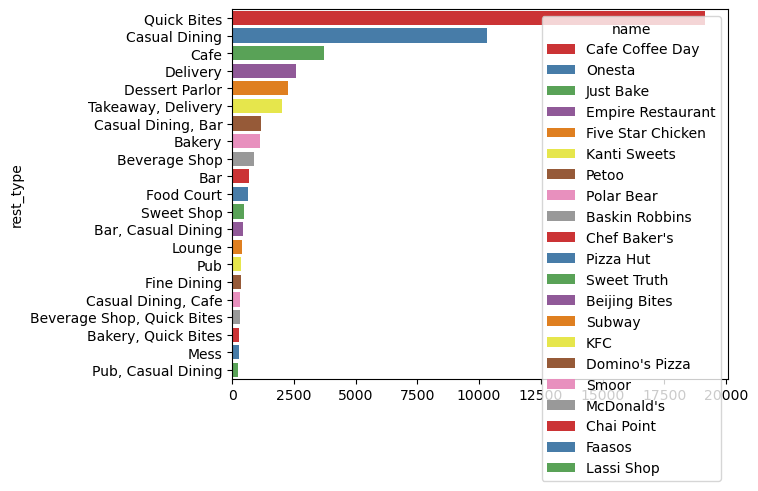

In [14]:
sns.barplot(y= rest_type,x=rest_type_count, orient = 'h', hue = names, palette = 'Set1')

#### 6. Approx cost 4 two peeps : Data distribution

In [15]:
zomato_df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [16]:
#zomato_df.dropna(inplace=True) 
raw =zomato_df['approx_cost(for two people)'].str.replace(',','').astype('float64')
raw


0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

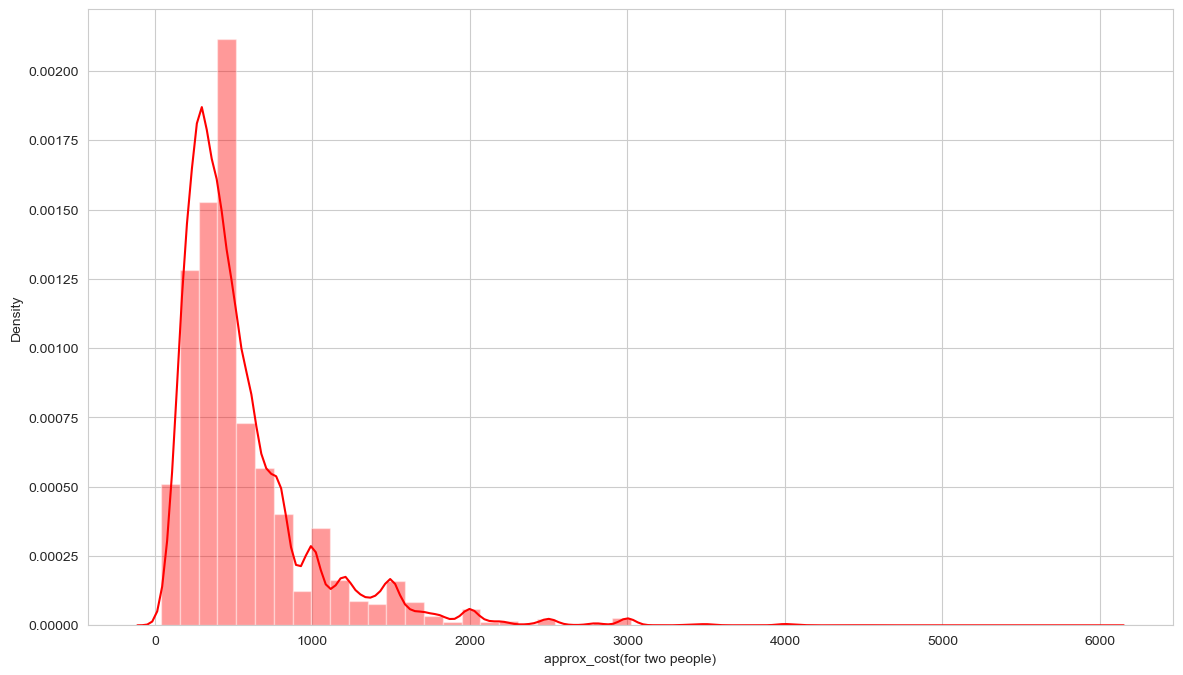

In [17]:
plt.figure(figsize = (14,8))
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
sns.distplot(raw,color='red')

* The above graph is +ve ly skewed

#### 7. Least popular retaurent

<Axes: ylabel='rest_type'>

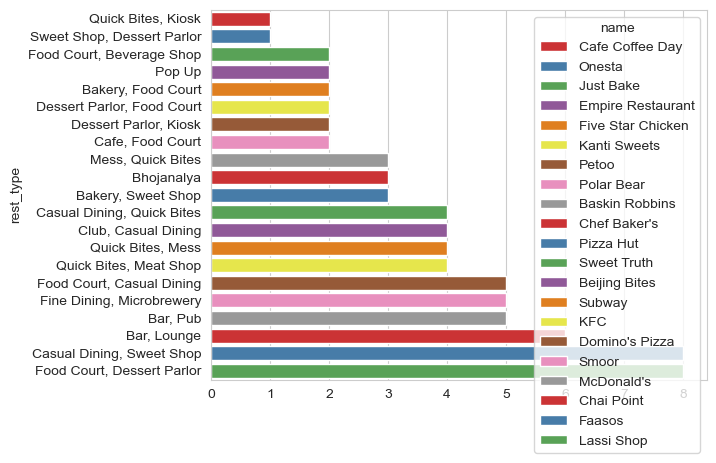

In [18]:

xx = zomato_df['rest_type'].value_counts().sort_values(ascending = True)[:21].index
yy = zomato_df['rest_type'].value_counts().sort_values(ascending = True)[:21].values
sns.barplot(y= xx,x=yy, orient = 'h', hue = names, palette = 'Set1')

In [19]:
raw.median()

400.0

In [20]:
Q1 = raw.quantile(.25)     # Q1 is the first quantile in a box plot
Q2 = raw.quantile(.5)      #Q2 second quantile(median)
Q3 = raw.quantile(.75)     #Q3 thrid quantile of box plot

# IQR (Inter quartile range) :  IQR = Q3 - Q1

#### 8. Top 20 loc with most number restaurent

<Axes: ylabel='location'>

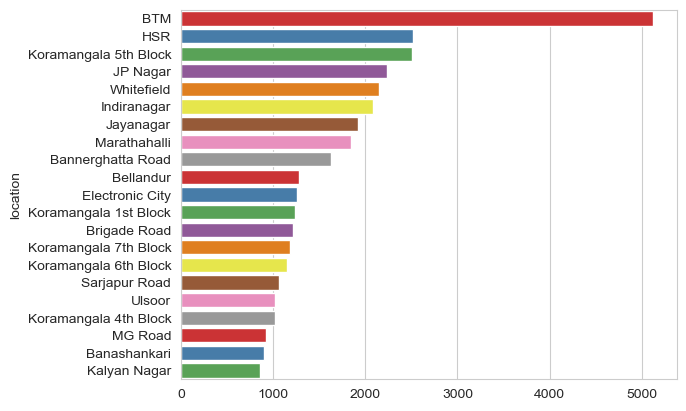

In [21]:
top = zomato_df['location'].value_counts().sort_values(ascending = False)[:21].index
tcount = zomato_df['location'].value_counts().sort_values(ascending = False)[:21].values
sns.barplot(y= top,x=tcount, orient = 'h', hue = top, palette = 'Set1')


#### 9. What bengluru eats

<Axes: ylabel='cuisines'>

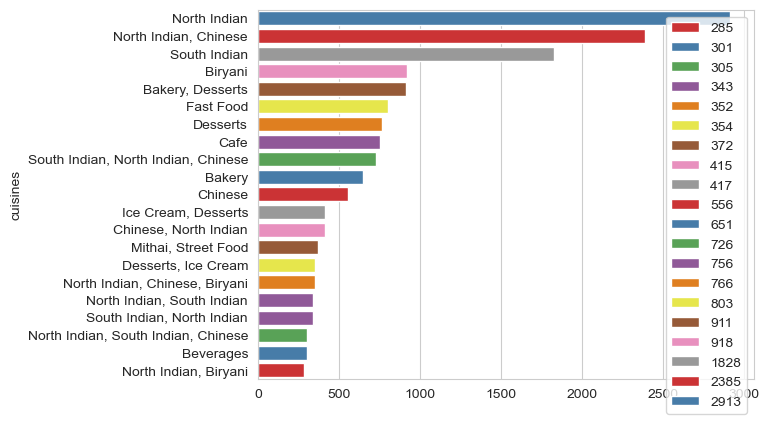

In [22]:
food = zomato_df['cuisines'].value_counts().sort_values(ascending = False)[:21].index
fcount = zomato_df['cuisines'].value_counts().sort_values(ascending = False)[:21].values

sns.barplot(y= food,x=fcount, orient = 'h', hue = fcount, palette = 'Set1')

* bengluru eats north indian food a lot, but loves biriyani

#### 10. Restraunt Ratings

<Axes: xlabel='rate', ylabel='Density'>

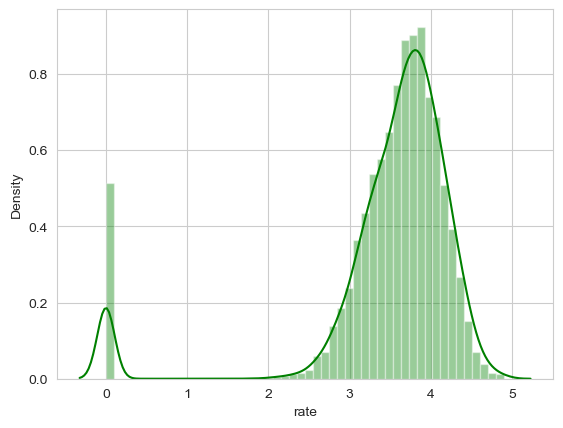

In [23]:

raw =zomato_df['rate'].str.replace('/5','').replace('NEW',0).replace('-',np.nan).astype('float64')
zomato_df['rate'] = raw
sns.distplot(raw,color = 'green')


#### 11. Top rated restaurant from to 20 cusine

In [24]:
zomato_df.groupby('rest_type')[['name','rate']].max().filter(items = rest_type, axis =0)

,name,rate
rest_type,,
Quick Bites,repEAT Hub,4.8
Casual Dining,nu.tree,4.9
Cafe,iSpice Resto Cafe,4.6
Delivery,nu.tree,4.6
Dessert Parlor,iFruit Live Ice Creams,4.9
"Takeaway, Delivery",sCoolMeal,4.5
"Casual Dining, Bar",re:cess - Hilton Bangalore Embassy GolfLinks,4.9
Bakery,YummTumm,4.8
Beverage Shop,Zaitoon Lassi Cafe,4.5


#### 12. Relating rating and 2 person price

In [25]:
#sns.scatterplot(x= raw,y='approx_cost(for two people)',data = 'zomato_df')

#### 13 . Represent restaurent on map

In [26]:
!pip install geopy

In [27]:
!pip install folium

In [28]:
from geopy.geocoders import Nominatim

import folium
from folium.plugins import HeatMap

In [29]:
# locations = pd.DataFrame({'Name':zomato_df['location'].unique()})
# locations['Name'] = locations['Name'].apply(lambda x:"Banglore" + str(x)) 
# geolocator = Nominatim(user_agent="app")

# lat_long = []
# for location in locations['Name']:
#     location = geolocator.geocode(location)
#     if location is None:
#         lat_long.append(np.nan)
#     else:
#         geo = (location.latitude,location.longitude)
#         lat_long.append(geos

In [78]:
locations = pd.read_csv("locations.csv")
locations['Name'] = locations['Name'].str.replace('Bangalore ','')
locations.drop('Unnamed: 0',axis = 1, inplace = True)
locations

,Name,geo_loc
0,Banashankari,"(12.9393328, 77.5539819)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.3868975, 76.6671106)"
3,Jayanagar,"(12.9399039, 77.5826382)"
4,Kumaraswamy Layout,"(12.9067683, 77.5595021)"
...,...,...
89,West Bangalore,"(13.0096524, 77.5530535343493)"
90,Magadi Road,"(12.9756527, 77.5553548)"
91,Yelahanka,"(12.98815675, 77.62260003796)"
92,Sahakara Nagar,"(13.0621474, 77.58006135480495)"


In [31]:

zomato_loc = pd.DataFrame(zomato_df['location'].value_counts().reset_index())
zomato_loc.columns = ['Name','count']
zomato_loc

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,West Bangalore,6
89,Yelahanka,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [32]:
zomato_loc = zomato_loc.merge(locations, on ='Name', how ='left')

In [33]:
zomato_loc

,Name,count,geo_loc
0,BTM,5124,"(12.9163603, 77.604733)"
1,HSR,2523,"(12.90056335, 77.64947470503677)"
2,Koramangala 5th Block,2504,"(12.9348429, 77.6189768)"
3,JP Nagar,2235,"(12.9096941, 77.5866067)"
4,Whitefield,2144,"(12.9696365, 77.7497448)"
...,...,...,...
88,West Bangalore,6,"(13.0096524, 77.5530535343493)"
89,Yelahanka,6,"(12.98815675, 77.62260003796)"
90,Jakkur,3,"(13.0724567, 77.6041563)"
91,Rajarajeshwari Nagar,2,"(12.94393425, 77.5091805440154)"


In [ ]:
zomato_loc.dropna(inplace= True)

In [ ]:
def generateBaseMap(default_location = [12.9,77.5], defaultzoom = 12):
    basemap = folium.Map(location = default_location, control_scale=True,zoom_start = default_zoom)

In [ ]:
basemap = folium.Map(location = [12.9,77.5], control_scale=True,zoom_start =12 )

In [ ]:
zomato_loc['geo_loc'] = zomato_loc['geo_loc'].str.lstrip('(').str.rstrip(')').str.split(',')

In [ ]:
lat,long = zip(*np.array(zomato_loc['geo_loc']))
zomato_loc['Lat'] = lat
zomato_loc['Long'] = long
HeatMap(zomato_loc[['Lat','Long','count']].values.tolist(), zoom = 20).add_to(basemap)

In [ ]:
basemap

#### Task
* Show the region of (a)South Indian (b)North Indian  on basemap

In [70]:
north_loc = zomato_df[zomato_df['cuisines'] == 'North Indian']['location'].value_counts().reset_index()
north_loc.columns = ['Name', 'Count']
north_loc

,Name,Count
0,BTM,340
1,Whitefield,188
2,HSR,173
3,Bellandur,161
4,JP Nagar,157
...,...,...
63,Yeshwantpur,3
64,East Bangalore,2
65,Hennur,2
66,City Market,1


In [79]:
locations

,Name,geo_loc
0,Banashankari,"(12.9393328, 77.5539819)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.3868975, 76.6671106)"
3,Jayanagar,"(12.9399039, 77.5826382)"
4,Kumaraswamy Layout,"(12.9067683, 77.5595021)"
...,...,...
89,West Bangalore,"(13.0096524, 77.5530535343493)"
90,Magadi Road,"(12.9756527, 77.5553548)"
91,Yelahanka,"(12.98815675, 77.62260003796)"
92,Sahakara Nagar,"(13.0621474, 77.58006135480495)"


In [82]:
south_loc = zomato_df[zomato_df['cuisines'] == 'South Indian']['location'].value_counts().reset_index()
south_loc.columns = ['Name', 'Count']
south_loc

,Name,Count
0,BTM,113
1,Jayanagar,99
2,Basavanagudi,89
3,JP Nagar,89
4,Banashankari,86
...,...,...
66,Sankey Road,1
67,RT Nagar,1
68,South Bangalore,1
69,Jalahalli,1


In [80]:
north_locs = north_loc.merge(locations, on ='Name', how ='inner')
north_locs

,Name,Count,geo_loc
0,BTM,340,"(12.9163603, 77.604733)"
1,Whitefield,188,"(12.9696365, 77.7497448)"
2,HSR,173,"(12.90056335, 77.64947470503677)"
3,Bellandur,161,"(12.93103185, 77.6782471)"
4,JP Nagar,157,"(12.9096941, 77.5866067)"
...,...,...,...
63,Yeshwantpur,3,"(13.02383, 77.5529215)"
64,East Bangalore,2,"(12.98815675, 77.62260003796)"
65,Hennur,2,"(13.0258087, 77.6305067)"
66,City Market,1,"(12.965717999999999, 77.5762705372058)"


In [83]:
south_locs = south_loc.merge(locations, on ='Name', how ='inner')
south_locs

,Name,Count,geo_loc
0,BTM,113,"(12.9163603, 77.604733)"
1,Jayanagar,99,"(12.9399039, 77.5826382)"
2,Basavanagudi,89,"(12.9417261, 77.5755021)"
3,JP Nagar,89,"(12.9096941, 77.5866067)"
4,Banashankari,86,"(12.9393328, 77.5539819)"
...,...,...,...
66,Sankey Road,1,"(13.0078796, 77.5726686)"
67,RT Nagar,1,"(13.0227204, 77.595715)"
68,South Bangalore,1,"(12.98815675, 77.62260003796)"
69,Jalahalli,1,"(13.0394104, 77.5197351)"
